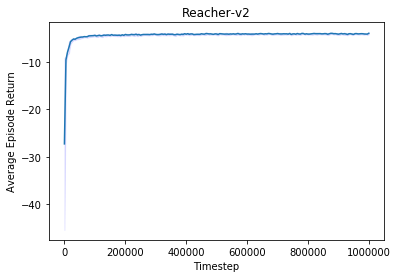

In [20]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

envs = ['HalfCheetah-v2', 
        'InvertedPendulum-v2',
        'Hopper-v2',
        'Walker2d-v2',
        'Ant-v2',
        'InvertedDoublePendulum-v2',
        'Reacher-v2']
seeds = [int(i) for i in range(10)]

os.makedirs('graphs', exist_ok=True)

for env in envs:
    
    reses = [np.load(f'TD3_{env}_{seed}.npy') for seed in seeds]
    reses = np.array(reses)
    
    means = np.mean(reses, axis=0)
    stds = np.std(reses, axis=0)
    
    x_axis = np.arange(len(means)) * 5000 # 5000 is the number of env timestep between policy evaluation step
    
    plt.clf()
    plt.plot(x_axis, means)
    plt.fill_between(x_axis, means-stds, means+stds, color=[0, 0, 1, 0.1])
    plt.title(env)
    plt.xlabel('Timestep')
    plt.ylabel('Average Episode Return')
#     plt.show()
    plt.savefig(f'graphs/{env}.png', bbox_inches='tight')